# サンプリング周波数について
音声などのアナログ波形をデジタルデータにするために必要な処理である標本化（サンプリング）で，単位時間当たりに標本を採る頻度。単位は**Hz**が一般的であるが，sps(sample per second)を使うこともある。<br>
同時に，サンプリング間隔もわかる。サンプリング間隔とは，サンプル間の時間差のことである。例えば，サンプリング周波数が100Hzの場合，サンプリング間隔は10msec(0.01sec)である。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

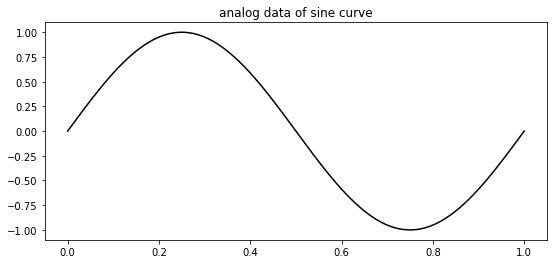

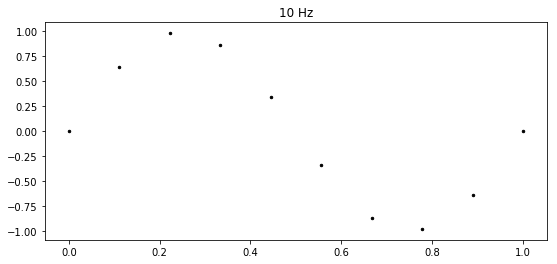

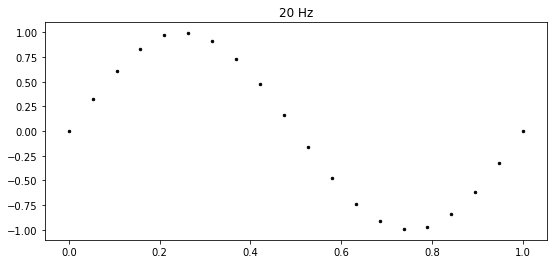

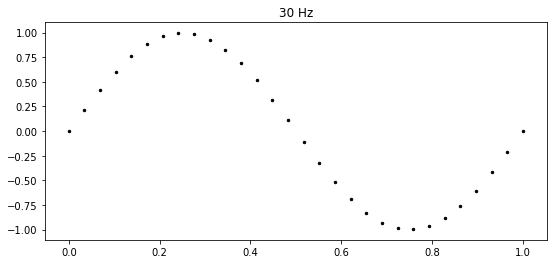

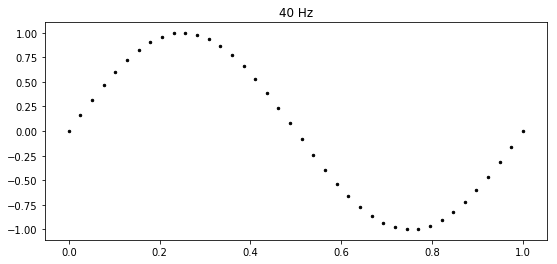

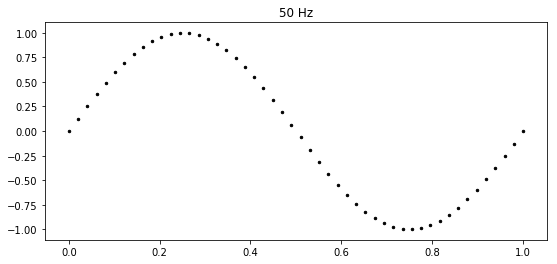

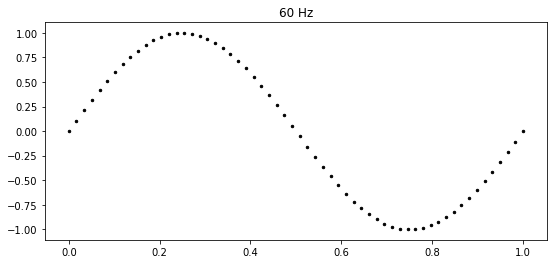

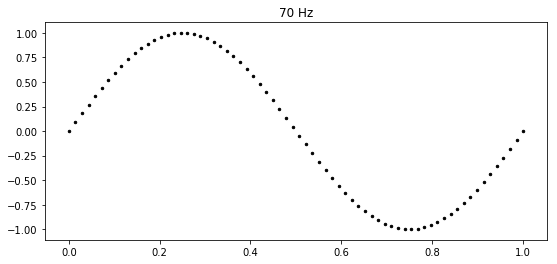

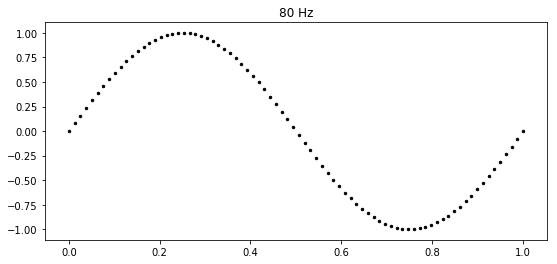

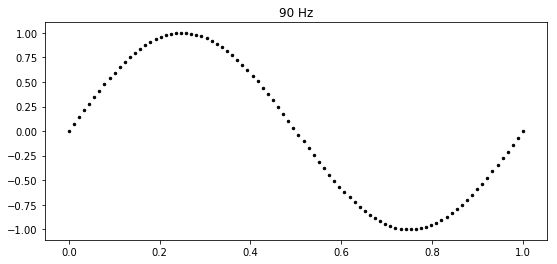

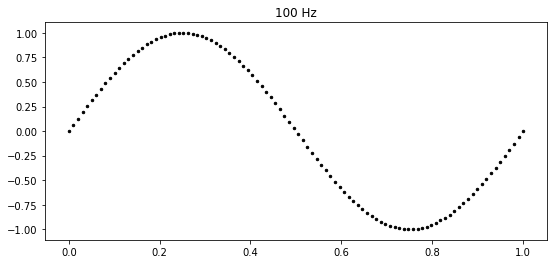

In [22]:
fig = plt.figure(figsize=(9,4))
plt.plot(np.linspace(0,1,10000),np.sin(np.linspace(0,2*np.pi,10000)),color='k')
plt.title("analog data of sine curve")
for i in range(1,11):
    pp = np.linspace(0,2*np.pi,10*i)
    time = np.linspace(0,1,10*i)
    a = np.sin(pp)
    fig = plt.figure(figsize=(9,4))
    plt.scatter(time,a,s=6,c="k")
    plt.title(f"{10*i} Hz")

# 問題
サンプル周波数が100Hzの場合，一秒間に何個のデータがあるか？<br>
ある生体情報を5秒間計測した。そのときのデータ数が250個であった。サンプリング周波数(Hz)はいくらか？<br>
サンプリング間隔(msec)はいくらか？

# フィルタリングの原理
プリズムでは可視光線が虹色に分類される。ばらばらな周波数が合成されて光となっているが，周波数ごとに分けることで周波数に特化した色が集まり表れ，その色が見える。<br>
時系列のデータでも同じようなことがおきていると仮定して，フィルタリングを行う。

In [187]:
N=2**11   # data number
dt = 0.01  # sampling distance
f1,f2 = 10,30   # freqency
t = np.arange(0,N*dt,dt)   # time
freq = np.linspace(0,1.0/dt,N)  # Hz
f=np.sin(2*np.pi*f1*t)+np.sin(2*np.pi*f2*t)+0.3*np.random.randn(N) # data

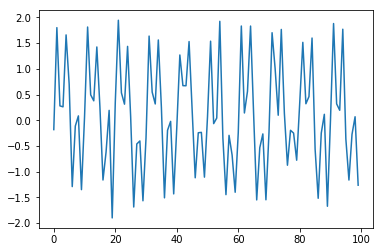

In [179]:
plt.plot(f[:100])

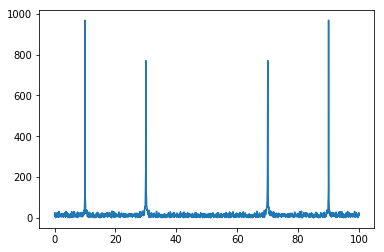

In [172]:
plt.plot(freq,np.abs(np.fft.fft(f)))

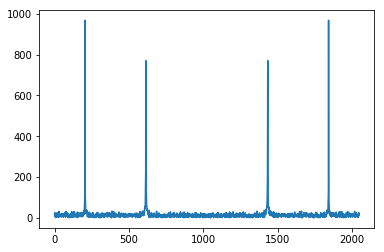

In [173]:
plt.plot(np.abs(np.fft.fft(f)))

In [192]:
wave = 300
ffti = np.fft.fft(f)
ffti[wave:-wave] = 0
fftr = np.fft.ifft(ffti)
freq[wave]

14.655593551538837

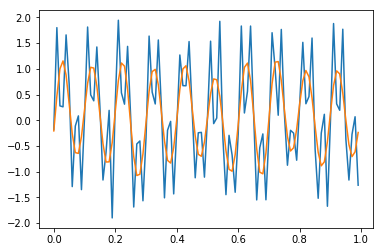

In [184]:
plt.plot(t[:100],f[:100])
plt.plot(t[:100],fftr[:100].real)
